# This Jupyter Notebook will be used for the Applied Data Science Capstone Project

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#import file
filename = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"

In [3]:
#Read file into Dataframe df
df = pd.read_csv(filename)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Display first 5 rows and all columns
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
#Display the data types
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
#Count the number of occurences of the various severity levels
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

##### Create a Car_Accidents dataframe with the attributes we are interested in - SeverityCode, ADDRTYPE, INCDATE, INCDTTM, WEATHER, ROADCOND, LIGHTCOND

In [7]:
Car_Accidents = df[['SEVERITYCODE','ADDRTYPE', 'INCDATE', 'INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]

In [8]:
#Display the first 5 rows of the new Dataframe
Car_Accidents.head()

,SEVERITYCODE,ADDRTYPE,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,1,Block,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,1,Block,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,1,Block,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,2,Intersection,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,Raining,Wet,Daylight


In [9]:
Car_Accidents['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

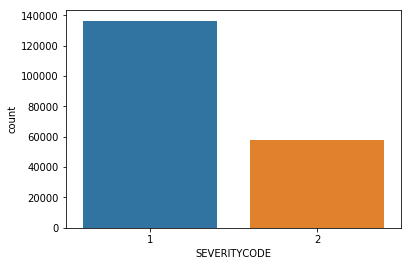

In [53]:
#Visually compare number of level 1 severity vs level 2 severity
ax=sns.countplot(x="SEVERITYCODE",data=Car_Accidents)

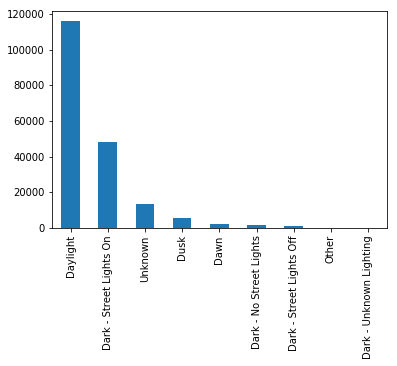

In [10]:
Car_Accidents['LIGHTCOND'].value_counts().plot(kind="bar")

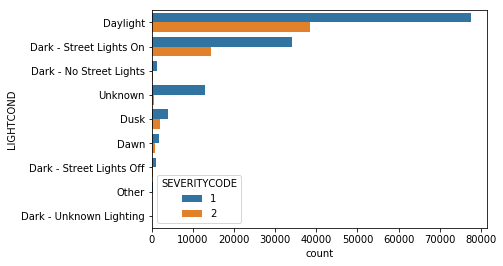

In [55]:
ax=sns.countplot(y="LIGHTCOND",hue="SEVERITYCODE", data=Car_Accidents)

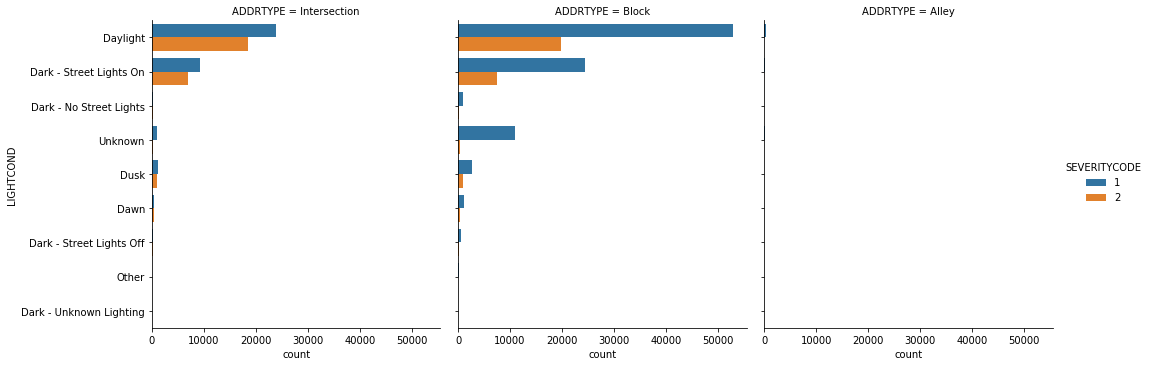

In [63]:
cp = sns.catplot(y="LIGHTCOND", hue="SEVERITYCODE", col="ADDRTYPE", data=Car_Accidents, kind="count")

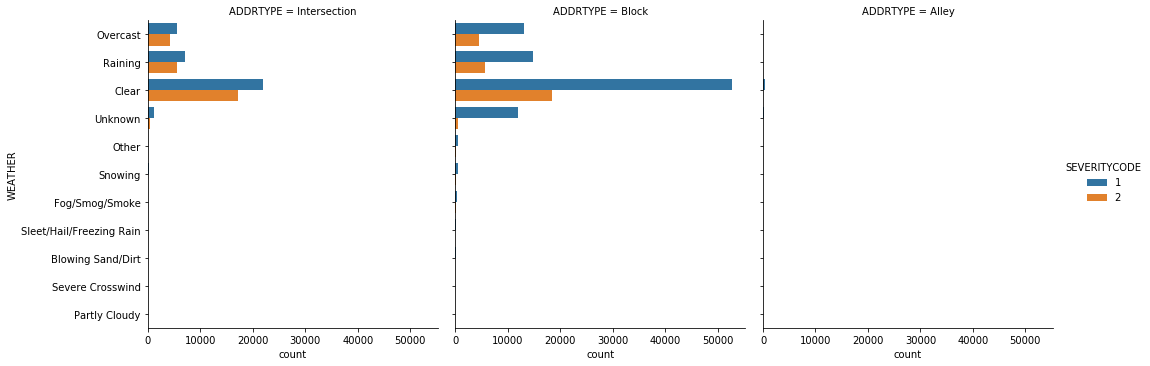

In [67]:
cp = sns.catplot(y="WEATHER", hue="SEVERITYCODE", col="ADDRTYPE", data=Car_Accidents, kind="count")

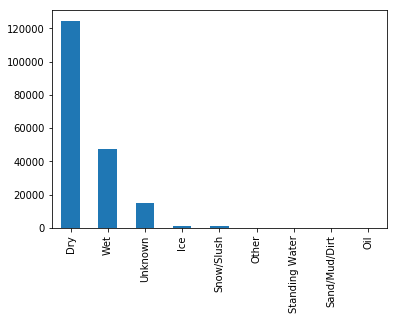

In [57]:
Car_Accidents['ROADCOND'].value_counts().plot(kind="bar")

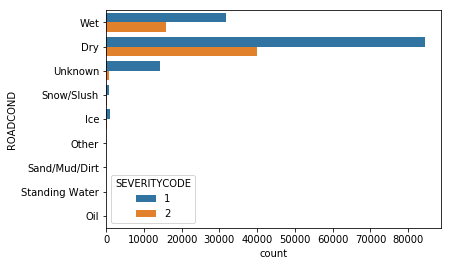

In [58]:
ax=sns.countplot(y="ROADCOND",hue="SEVERITYCODE", data=Car_Accidents)

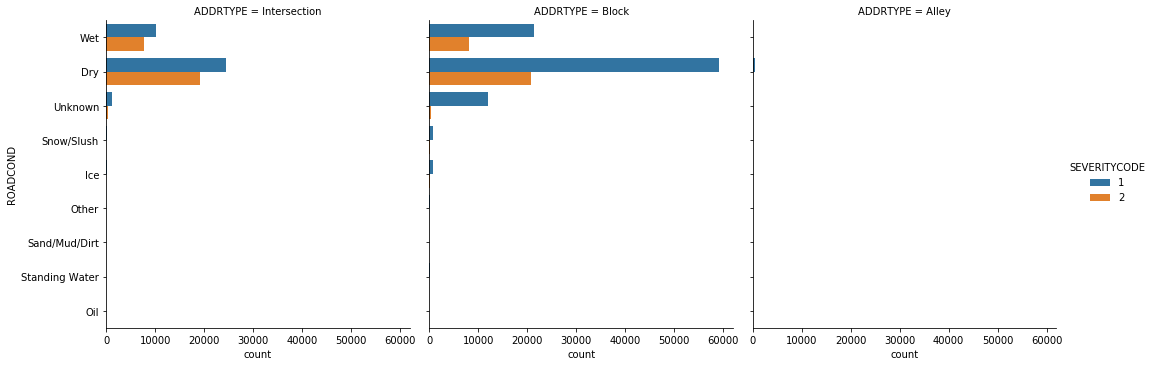

In [64]:
cp = sns.catplot(y="ROADCOND", hue="SEVERITYCODE", col="ADDRTYPE", data=Car_Accidents, kind="count")

In [12]:
Car_Accidents['INCDTTM1'] = pd.to_datetime(df['INCDTTM'])
Car_Accidents['WEEKDAY'] = Car_Accidents['INCDTTM1'].dt.day_name()
Car_Accidents['HOUROFDAY'] = Car_Accidents['INCDTTM1'].dt.hour
Car_Accidents.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,SEVERITYCODE,ADDRTYPE,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,INCDTTM1,WEEKDAY,HOUROFDAY
0,2,Intersection,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,2013-03-27 14:54:00,Wednesday,14
1,1,Block,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,2006-12-20 18:55:00,Wednesday,18
2,1,Block,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,2004-11-18 10:20:00,Thursday,10
3,1,Block,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,2013-03-29 09:26:00,Friday,9
4,2,Intersection,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,2004-01-28 08:04:00,Wednesday,8


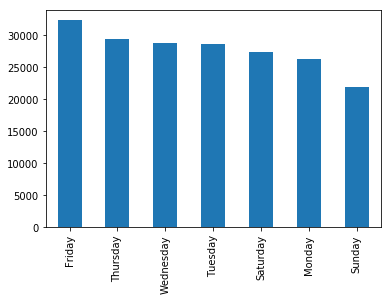

In [13]:
Car_Accidents['WEEKDAY'].value_counts().plot(kind="bar")

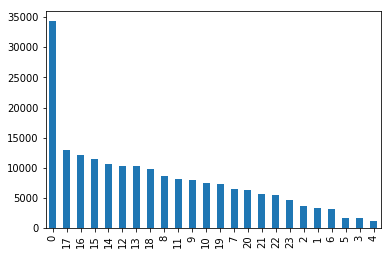

In [14]:
Car_Accidents['HOUROFDAY'].value_counts().plot(kind="bar")

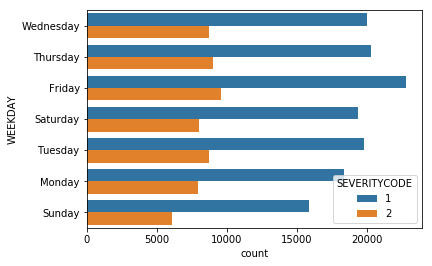

In [61]:
ax=sns.countplot(y="WEEKDAY",hue="SEVERITYCODE", data=Car_Accidents)

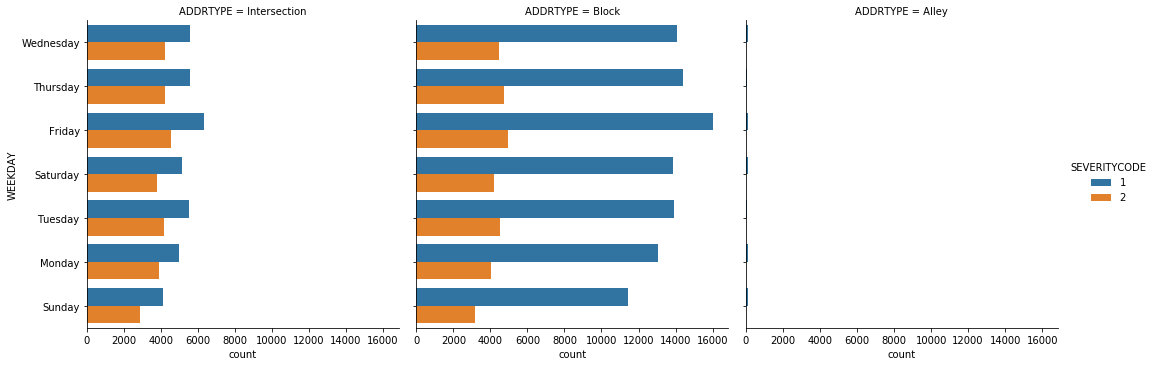

In [65]:
cp = sns.catplot(y="WEEKDAY", hue="SEVERITYCODE", col="ADDRTYPE", data=Car_Accidents, kind="count")

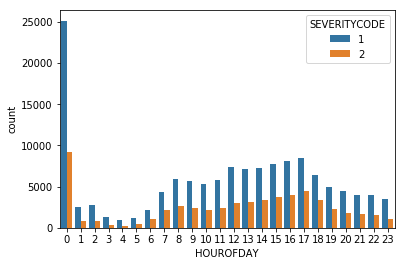

In [59]:
ax=sns.countplot(x="HOUROFDAY",hue="SEVERITYCODE", data=Car_Accidents)

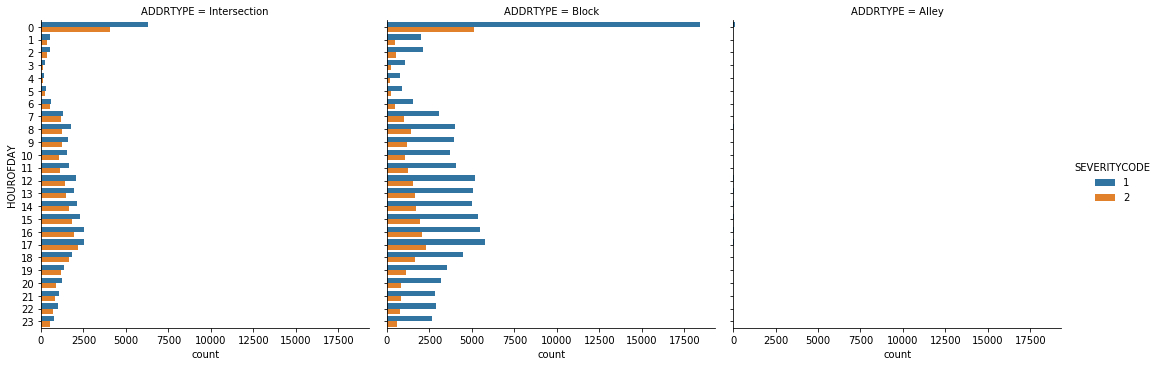

In [66]:
cp = sns.catplot(y="HOUROFDAY", hue="SEVERITYCODE", col="ADDRTYPE", data=Car_Accidents, kind="count")

In [15]:
missing_data_acc = Car_Accidents.isnull()
missing_data_acc.head(5)

,SEVERITYCODE,ADDRTYPE,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,INCDTTM1,WEEKDAY,HOUROFDAY
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [16]:
for column_acc in missing_data_acc.columns.values.tolist():
    print(column_acc)
    print (missing_data_acc[column_acc].value_counts())
    print("")  

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

INCDTTM1
False    194673
Name: INCDTTM1, dtype: int64

WEEKDAY
False    194673
Name: WEEKDAY, dtype: int64

HOUROFDAY
False    194673
Name: HOUROFDAY, dtype: int64



There are two types of accident severity. Also based on the differences in the number of samples for each accident severity type, we can ee that the data is imbalanced.

#### Balancing the Data using down-sampling

In [17]:
df_sev_majority = Car_Accidents[Car_Accidents['SEVERITYCODE'] == 1]
df_sev_minority = Car_Accidents[Car_Accidents['SEVERITYCODE'] == 2]

In [18]:
df_majority_downsampled = resample(df_sev_majority, 
                                 replace=False,      # sample without replacement
                                 n_samples=58188,     # to match minority class
                                 random_state=123)   # reproducible results

In [19]:
# Combine minority class with downsampled majority class
df_result = pd.concat([df_majority_downsampled, df_sev_minority])

#### The Dataset is now Balanced

In [20]:
df_result['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

#### Evaluating for Missing Data

In [21]:
missing_data1 = df_result.isnull()
missing_data1.head(5)

,SEVERITYCODE,ADDRTYPE,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,INCDTTM1,WEEKDAY,HOUROFDAY
25055,False,False,False,False,False,False,False,False,False,False
65280,False,False,False,False,False,False,False,False,False,False
86292,False,False,False,False,False,False,False,False,False,False
155111,False,False,False,False,False,False,False,False,False,False
64598,False,False,False,False,False,False,False,False,False,False


#### Count Missing Values in Each Column

In [22]:
for column in missing_data1.columns.values.tolist():
    print(column)
    print (missing_data1[column].value_counts())
    print("")  

SEVERITYCODE
False    116376
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    115454
True        922
Name: ADDRTYPE, dtype: int64

INCDATE
False    116376
Name: INCDATE, dtype: int64

INCDTTM
False    116376
Name: INCDTTM, dtype: int64

WEATHER
False    113560
True       2816
Name: WEATHER, dtype: int64

ROADCOND
False    113612
True       2764
Name: ROADCOND, dtype: int64

LIGHTCOND
False    113528
True       2848
Name: LIGHTCOND, dtype: int64

INCDTTM1
False    116376
Name: INCDTTM1, dtype: int64

WEEKDAY
False    116376
Name: WEEKDAY, dtype: int64

HOUROFDAY
False    116376
Name: HOUROFDAY, dtype: int64



#####  Address Type, Weather Conditions, Road Conditions and Light Conditions all have missing values, these rows will therefore be dropped

In [23]:
df_result.dtypes

SEVERITYCODE             int64
ADDRTYPE                object
INCDATE                 object
INCDTTM                 object
WEATHER                 object
ROADCOND                object
LIGHTCOND               object
INCDTTM1        datetime64[ns]
WEEKDAY                 object
HOUROFDAY                int64
dtype: object

In [24]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116376 entries, 25055 to 194671
Data columns (total 10 columns):
SEVERITYCODE    116376 non-null int64
ADDRTYPE        115454 non-null object
INCDATE         116376 non-null object
INCDTTM         116376 non-null object
WEATHER         113560 non-null object
ROADCOND        113612 non-null object
LIGHTCOND       113528 non-null object
INCDTTM1        116376 non-null datetime64[ns]
WEEKDAY         116376 non-null object
HOUROFDAY       116376 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.8+ MB


#####ADDRTYPE, WEATHER, ROADCOND, LIGHTCOND attributes have missing values. Dropping these rows.

In [25]:
#Drop any row that has at least one missing value
df_clean = df_result.dropna()

#Drop rows where value is 'Unknown'
df_clean = df_clean[df_clean.LIGHTCOND != 'Unknown']
df_clean = df_clean[df_clean.ROADCOND != 'Unknown']
df_clean = df_clean[df_clean.WEATHER != 'Unknown']

In [26]:
missing_data2 = df_clean.isnull()


for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")  

SEVERITYCODE
False    104381
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    104381
Name: ADDRTYPE, dtype: int64

INCDATE
False    104381
Name: INCDATE, dtype: int64

INCDTTM
False    104381
Name: INCDTTM, dtype: int64

WEATHER
False    104381
Name: WEATHER, dtype: int64

ROADCOND
False    104381
Name: ROADCOND, dtype: int64

LIGHTCOND
False    104381
Name: LIGHTCOND, dtype: int64

INCDTTM1
False    104381
Name: INCDTTM1, dtype: int64

WEEKDAY
False    104381
Name: WEEKDAY, dtype: int64

HOUROFDAY
False    104381
Name: HOUROFDAY, dtype: int64



##### Data is now clean. There are now 104,070 samples compared with 116,376 from the balanced dataset. 

In [27]:
lb_weather = LabelEncoder()
df_clean['WEATHER_CODE'] = lb_weather.fit_transform(df_clean['WEATHER'])


In [28]:
lb_roadcond = LabelEncoder()
lb_lightcond = LabelEncoder()
lb_addrtype = LabelEncoder()
df_clean['ROADCOND_CODE'] = lb_roadcond.fit_transform(df_clean['ROADCOND'])
df_clean['LIGHTCOND_CODE'] = lb_lightcond.fit_transform(df_clean['LIGHTCOND'])
df_clean['ADDRTYPE_CODE'] = lb_addrtype.fit_transform(df_clean['ADDRTYPE'])

In [29]:
df_clean.head(10)

,SEVERITYCODE,ADDRTYPE,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,INCDTTM1,WEEKDAY,HOUROFDAY,WEATHER_CODE,ROADCOND_CODE,LIGHTCOND_CODE,ADDRTYPE_CODE
25055,1,Intersection,2005/01/22 00:00:00+00,1/22/2005 8:30:00 PM,Raining,Wet,Dark - Street Lights On,2005-01-22 20:30:00,Saturday,20,6,7,2,2
65280,1,Intersection,2008/08/22 00:00:00+00,8/22/2008 10:45:00 AM,Clear,Dry,Daylight,2008-08-22 10:45:00,Friday,10,1,0,5,2
155111,1,Block,2016/06/17 00:00:00+00,6/17/2016 9:17:00 AM,Clear,Dry,Daylight,2016-06-17 09:17:00,Friday,9,1,0,5,1
64598,1,Block,2008/03/09 00:00:00+00,3/9/2008,Clear,Dry,Daylight,2008-03-09 00:00:00,Sunday,0,1,0,5,1
119954,1,Intersection,2013/07/12 00:00:00+00,7/12/2013 12:10:00 PM,Clear,Dry,Daylight,2013-07-12 12:10:00,Friday,12,1,0,5,2
64063,1,Block,2008/11/14 00:00:00+00,11/14/2008 4:04:00 PM,Clear,Dry,Daylight,2008-11-14 16:04:00,Friday,16,1,0,5,1
105379,1,Block,2011/08/29 00:00:00+00,8/29/2011 5:07:00 PM,Clear,Dry,Daylight,2011-08-29 17:07:00,Monday,17,1,0,5,1
187708,1,Intersection,2019/05/01 00:00:00+00,5/1/2019 4:21:00 PM,Clear,Dry,Daylight,2019-05-01 16:21:00,Wednesday,16,1,0,5,2
156744,1,Block,2016/06/26 00:00:00+00,6/26/2016 2:15:00 AM,Clear,Dry,Dark - Street Lights On,2016-06-26 02:15:00,Sunday,2,1,0,2,1
10240,1,Block,2004/11/30 00:00:00+00,11/30/2004 5:40:00 PM,Clear,Dry,Dusk,2004-11-30 17:40:00,Tuesday,17,1,0,6,1


In [30]:
df_clean.corr()

,SEVERITYCODE,HOUROFDAY,WEATHER_CODE,ROADCOND_CODE,LIGHTCOND_CODE,ADDRTYPE_CODE
SEVERITYCODE,1.000000,0.029974,0.002440,0.006021,0.042461,0.184117
HOUROFDAY,0.029974,1.000000,-0.017802,-0.018555,-0.051999,0.036576
WEATHER_CODE,0.002440,-0.017802,1.000000,0.802056,-0.146797,0.011144
ROADCOND_CODE,0.006021,-0.018555,0.802056,1.000000,-0.159117,0.016684
LIGHTCOND_CODE,0.042461,-0.051999,-0.146797,-0.159117,1.000000,0.030124
ADDRTYPE_CODE,0.184117,0.036576,0.011144,0.016684,0.030124,1.000000


In [31]:
df_clean['ADDRTYPE_CODE'].value_counts().to_frame()

,ADDRTYPE_CODE
1,62460
2,41610
0,311


In [32]:
df_clean['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,74358
Wet,28735
Ice,630
Snow/Slush,458
Other,69
Standing Water,52
Sand/Mud/Dirt,40
Oil,39


In [33]:
df_clean['WEATHER_CODE'].value_counts().to_frame()

,WEATHER_CODE
1,66656
6,20300
4,16388
9,434
2,345
3,154
8,61
0,26
7,13
5,4


In [34]:
df_clean['LIGHTCOND_CODE'].value_counts().to_frame()

,LIGHTCOND_CODE
5,69610
2,28246
6,3452
4,1491
0,807
1,662
7,106
3,7


In [35]:
df_clean['INCDTTM1'] = pd.to_datetime(df['INCDTTM'])
df_clean['WEEKDAY'] = df_clean['INCDTTM1'].dt.dayofweek
df_clean['HOUROFDAY'] = df_clean['INCDTTM1'].dt.hour
df_clean.head(5)

,SEVERITYCODE,ADDRTYPE,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,INCDTTM1,WEEKDAY,HOUROFDAY,WEATHER_CODE,ROADCOND_CODE,LIGHTCOND_CODE,ADDRTYPE_CODE
25055,1,Intersection,2005/01/22 00:00:00+00,1/22/2005 8:30:00 PM,Raining,Wet,Dark - Street Lights On,2005-01-22 20:30:00,5,20,6,7,2,2
65280,1,Intersection,2008/08/22 00:00:00+00,8/22/2008 10:45:00 AM,Clear,Dry,Daylight,2008-08-22 10:45:00,4,10,1,0,5,2
155111,1,Block,2016/06/17 00:00:00+00,6/17/2016 9:17:00 AM,Clear,Dry,Daylight,2016-06-17 09:17:00,4,9,1,0,5,1
64598,1,Block,2008/03/09 00:00:00+00,3/9/2008,Clear,Dry,Daylight,2008-03-09 00:00:00,6,0,1,0,5,1
119954,1,Intersection,2013/07/12 00:00:00+00,7/12/2013 12:10:00 PM,Clear,Dry,Daylight,2013-07-12 12:10:00,4,12,1,0,5,2


In [36]:
print(df_clean.dtypes)

SEVERITYCODE               int64
ADDRTYPE                  object
INCDATE                   object
INCDTTM                   object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
INCDTTM1          datetime64[ns]
WEEKDAY                    int64
HOUROFDAY                  int64
WEATHER_CODE               int64
ROADCOND_CODE              int64
LIGHTCOND_CODE             int64
ADDRTYPE_CODE              int64
dtype: object


In [37]:
df_clean['WEEKDAY'].value_counts().to_frame()

,WEEKDAY
4,17196
3,15976
2,15521
1,15484
5,14635
0,14105
6,11464


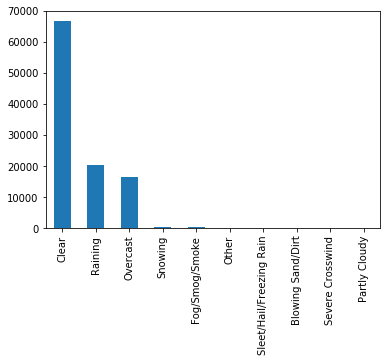

In [38]:
df_clean['WEATHER'].value_counts().plot(kind="bar")

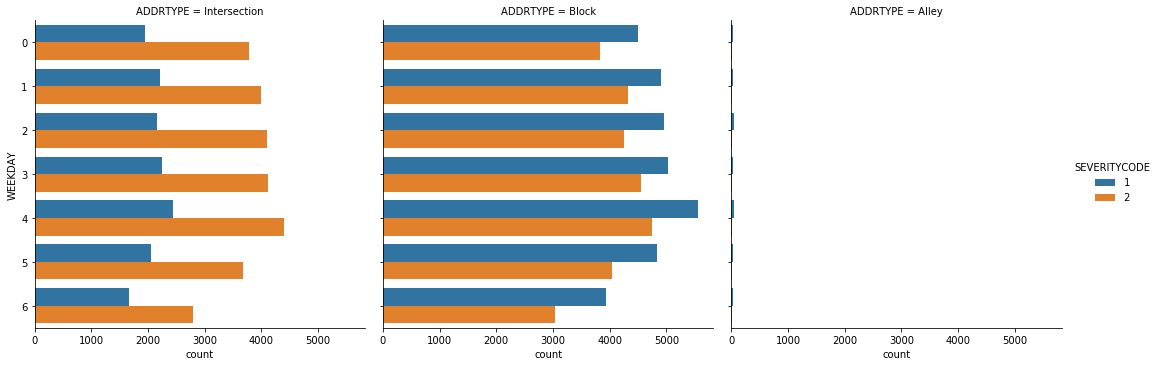

In [68]:
cp = sns.catplot(y="WEEKDAY", hue="SEVERITYCODE", col="ADDRTYPE", data=df_clean, kind="count")

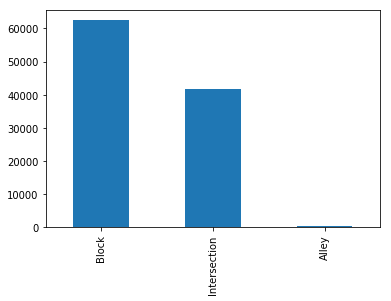

In [39]:
df_clean['ADDRTYPE'].value_counts().plot(kind="bar")

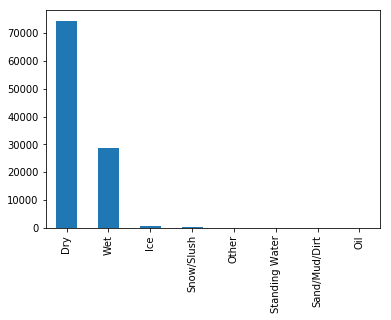

In [40]:
df_clean['ROADCOND'].value_counts().plot(kind="bar")

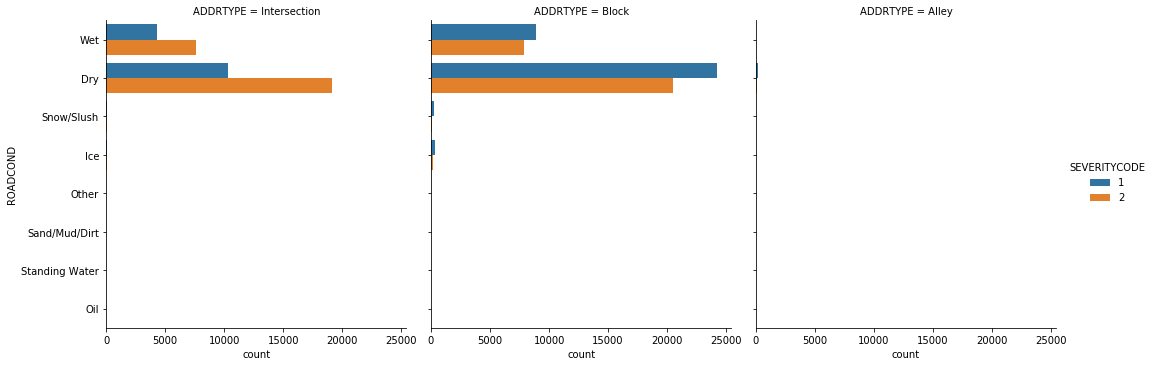

In [69]:
cp = sns.catplot(y="ROADCOND", hue="SEVERITYCODE", col="ADDRTYPE", data=df_clean, kind="count")

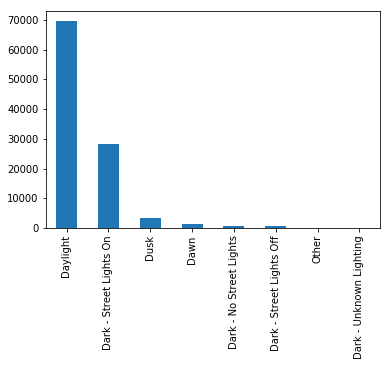

In [41]:
df_clean['LIGHTCOND'].value_counts().plot(kind="bar")

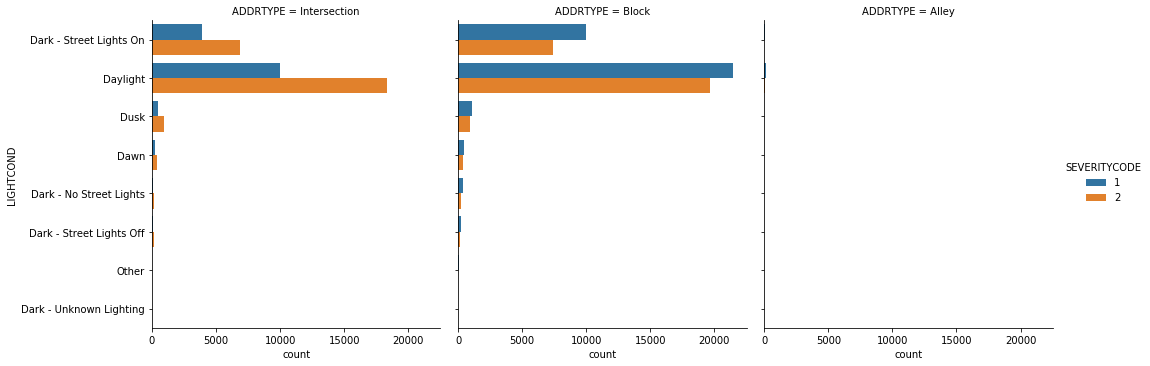

In [70]:
cp = sns.catplot(y="LIGHTCOND", hue="SEVERITYCODE", col="ADDRTYPE", data=df_clean, kind="count")

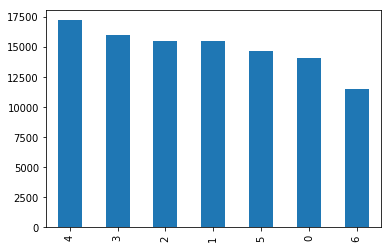

In [42]:
df_clean['WEEKDAY'].value_counts().plot(kind="bar")

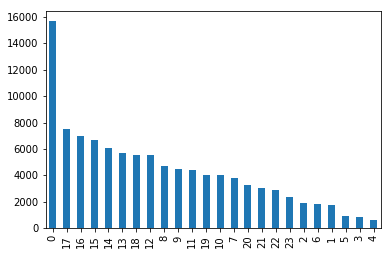

In [43]:
df_clean['HOUROFDAY'].value_counts().plot(kind="bar")

#### Define X and y

In [44]:
X= np.asarray(df_clean[["ADDRTYPE_CODE","WEATHER_CODE","ROADCOND_CODE","LIGHTCOND_CODE","WEEKDAY", "HOUROFDAY"]])
X[0:5]

array([[ 2,  6,  7,  2,  5, 20],
       [ 2,  1,  0,  5,  4, 10],
       [ 1,  1,  0,  5,  4,  9],
       [ 1,  1,  0,  5,  6,  0],
       [ 2,  1,  0,  5,  4, 12]])

In [45]:
y = np.asarray(df_clean["SEVERITYCODE"])
y[0:5]

array([1, 1, 1, 1, 1])

#### Normalize the Dataset

In [46]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.22078096,  1.67995581,  1.61040067, -1.49780714,  1.08425096,
         1.23217285],
       [ 1.22078096, -0.71155296, -0.62726751,  0.59718003,  0.56200352,
        -0.22674179],
       [-0.79923009, -0.71155296, -0.62726751,  0.59718003,  0.56200352,
        -0.37263325],
       [-0.79923009, -0.71155296, -0.62726751,  0.59718003,  1.60649841,
        -1.68565642],
       [ 1.22078096, -0.71155296, -0.62726751,  0.59718003,  0.56200352,
         0.06504114]])

#### Randomly split data into training and testing data using the function train_test_split. 80% for training, 20% for testing

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


print("Number of test samples:", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])
print("Test set:", x_test.shape, y_test.shape)
print("Training set:", x_train.shape, y_train.shape)

Number of test samples: 20877
Number of training samples: 83504
Test set: (20877, 6) (20877,)
Training set: (83504, 6) (83504,)


#### KNN

##### Training and Predicting

In [83]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.52699143, 0.50730469, 0.52919481, 0.5183695 , 0.53819993,
       0.52919481, 0.54389999, 0.53604445, 0.54682186, 0.54370839,
       0.54907314, 0.54744456, 0.55740767, 0.55161182, 0.55692868,
       0.55261771, 0.55683288, 0.55712028, 0.55817407, 0.56018585,
       0.56061695, 0.55913206, 0.56420942, 0.56061695, 0.56555061,
       0.56296403, 0.56344302, 0.56229343, 0.56262873, 0.56305983,
       0.56349092, 0.56301193, 0.5667481 , 0.5664128 , 0.5668439 ,
       0.56392202, 0.56737079, 0.56890358, 0.56703549, 0.566796  ,
       0.56871198, 0.56488001, 0.56741869, 0.5661733 , 0.56837668,
       0.56732289, 0.56852038, 0.56962207, 0.57091536])

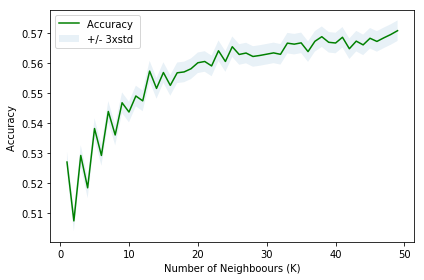

In [84]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighboours (K)')
plt.tight_layout()
plt.show()

In [85]:
k = 43
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat = neigh.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5876724468288944
Test set Accuracy:  0.5674186904248695


In [91]:

print('CONFUSION_MATRIX :\n')
print(confusion_matrix(yhat,y_test))
print('\n')
print('REPORT :\n')
print(classification_report(yhat,y_test))
print('ACCURACY: \n')
metrics.accuracy_score(yhat,y_test)

CONFUSION_MATRIX :

[[4581 3985]
 [5046 7265]]


REPORT :

              precision    recall  f1-score   support

           1       0.48      0.53      0.50      8566
           2       0.65      0.59      0.62     12311

   micro avg       0.57      0.57      0.57     20877
   macro avg       0.56      0.56      0.56     20877
weighted avg       0.58      0.57      0.57     20877

ACCURACY: 



0.5674186904248695

In [87]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier()
classification = DC.fit(x_train,y_train)
DC_yhat = DC.predict(x_test)
DC_yhat

array([1, 1, 2, ..., 2, 1, 1])

In [88]:
print('CONFUSION_MATRIX: \n')
print(confusion_matrix(DC_yhat,y_test))
print('REPORT: \n')
print(classification_report(DC_yhat,y_test))
print('ACCURACY: \n')
metrics.accuracy_score(DC_yhat,y_test)

CONFUSION_MATRIX: 

[[5316 4666]
 [4311 6584]]
REPORT: 

              precision    recall  f1-score   support

           1       0.55      0.53      0.54      9982
           2       0.59      0.60      0.59     10895

   micro avg       0.57      0.57      0.57     20877
   macro avg       0.57      0.57      0.57     20877
weighted avg       0.57      0.57      0.57     20877

ACCURACY: 



0.5700052689562677

In [89]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc_yhat = svc.predict(x_test)
svc_yhat

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 2, ..., 2, 1, 1])

In [90]:
print('CLASSIFICATION REPORT: \n')
print(metrics.classification_report(svc_yhat,y_test))
print('CONFUSION MATRIX: \n')
print(metrics.confusion_matrix(svc_yhat,y_test))
print('ACCURACY: \n')
print(metrics.accuracy_score(svc_yhat,y_test))

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           1       0.68      0.54      0.60     12214
           2       0.50      0.64      0.56      8663

   micro avg       0.58      0.58      0.58     20877
   macro avg       0.59      0.59      0.58     20877
weighted avg       0.60      0.58      0.58     20877

CONFUSION MATRIX: 

[[6537 5677]
 [3090 5573]]
ACCURACY: 

0.5800641854672606


In [81]:
# Evaluations
# Evaluate KNN
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

knn_yhat = neigh.predict(x_test)
jc_KNN = (jaccard_similarity_score(y_test, knn_yhat))
fs_KNN = (f1_score(y_test, knn_yhat,average='weighted'))

print("KNN Jaccard index: %.2f" % jc_KNN)
print("KNN F1-score: %.2f" % fs_KNN )


# Evaluate Decision Trees
dt_yhat = DC.predict(x_test)
jc_DT = (jaccard_similarity_score(y_test, dt_yhat))
fs_DT = (f1_score(y_test, dt_yhat,average='weighted'))

print("Decision Trees Jaccard index: %.2f" % jc_DT)
print("Decision Trees F1-score: %.2f" % fs_DT )

# Evaluate SVM
svm_yhat = svc.predict(x_test)
jc_SVM = (jaccard_similarity_score(y_test, svm_yhat))
fs_SVM = (f1_score(y_test, svm_yhat,average='weighted'))

print("SVM Jaccard index: %.2f" % jc_SVM)
print("SVM F1-score: %.2f" % fs_SVM )




KNN Jaccard index: 0.57
KNN F1-score: 0.57
Decision Trees Jaccard index: 0.57
Decision Trees F1-score: 0.57
SVM Jaccard index: 0.58
SVM F1-score: 0.58
